[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jesherjoshua/seds-quantum-computing/blob/mothership/Jesher/Simulator/some_circuits.ipynb)

In [ ]:
!pip install qiskit
!pip install pylatexenc
! git clone https://github.com/jesherjoshua/seds-quantum-computing.git

# Some Basic Circuits Using Qiskit 🚀

In [41]:
from qiskit import *
from IPython.display import display,clear_output,Image
from qiskit.tools.visualization import plot_histogram

# The Half - Adder ➕
## Make Registers

In [42]:
qr = QuantumRegister(4)
cr = ClassicalRegister(2)

## Make Circuit

In [43]:
circ = QuantumCircuit(qr,cr)

## Just a function to test our circuit

In [44]:
def test(circuit):
    backend = BasicAer.get_backend("qasm_simulator")
    job = execute(circuit, backend, shots=1)
    result = job.result()
    return list(result.get_counts().keys())[0]

## Input

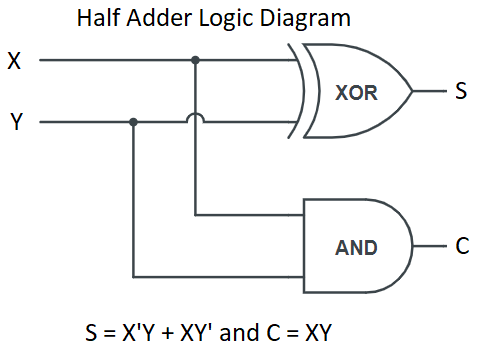

In [45]:
circ.x(0) #set both qubits to 1(i.e to simulate 1+1)
circ.x(1)
Image('seds-quantum-computing/Jesher/images/halfadder.png')

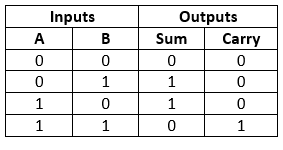

In [46]:
Image('seds-quantum-computing/Jesher/images/halfaddertt.png')

## Calculate the Sum

In [47]:
circ.cx(0,2)#XOR
circ.measure(2,0)
print(f'partial output: {test(circ)}')
circ.cx(1,2)
circ.measure(2,0)
print(f'Final output: {test(circ)}')

partial output: 01
Final output: 00


## Calculate the Carry

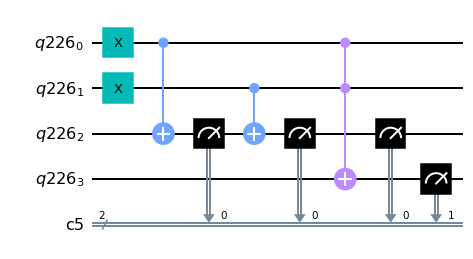

In [48]:

circ.ccx(0,1,3)#AND 
circ.measure(2,0)
circ.measure(3,1)
circ.draw('mpl')

## Put it all together

A	B	S	C
0	0	0	0
0	1	1	0
1	0	1	0
1	1	0	1


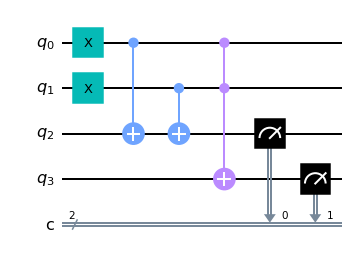

In [49]:

print("A\tB\tS\tC")
l = [(0, 0), (0, 1), (1, 0), (1, 1)]
for a, b in l:
    circ = QuantumCircuit(4,2)
    if a != 0:
        circ.x(0)
    if b != 0:
        circ.x(1)
    circ.cx(0,2)
    circ.cx(1,2)
    circ.ccx(0,1,3)#AND 
    circ.measure(3,1)
    circ.measure(2, 0)
    print(f"{a}\t{b}\t{test(circ)[1]}\t{test(circ)[0]}")

circ.draw('mpl')

# Half Subtractor ➖

In [50]:
qr = QuantumRegister(4)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)
circ.x(0) #set both qubits to 1(i.e to simulate 1+1)
circ.x(1)

## Logic Circuit

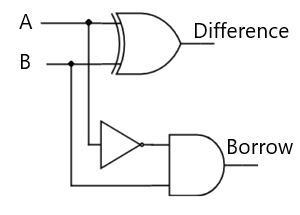

In [51]:
Image('seds-quantum-computing/Jesher/images/halfsubtractor.jpg')

## Truth Table

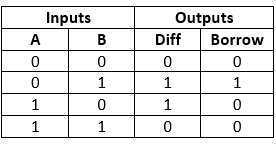

In [52]:
Image('seds-quantum-computing/Jesher/images/halfsubtractortt.png')

## Calculate Difference

In [53]:
circ.cx(0,2)#XOR
circ.cx(1,2)
circ.measure(2,0)
print(f'Difference output: {test(circ)}')

Difference output: 00


## Calculate Borrow

In [54]:
circ.x(0)
circ.ccx(0,1,3)#AND 
circ.measure(2,0)
circ.measure(3,1)
circ.draw('mpl')
print(f'Borrow Output: {test(circ)}')

Borrow Output: 00


## Put it all together

A	B	Diff	Borrow
0	0	0	0
0	1	1	1
1	0	1	0
1	1	0	0


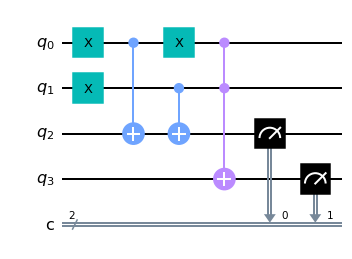

In [55]:

print("A\tB\tDiff\tBorrow")
l = [(0, 0), (0, 1), (1, 0), (1, 1)]
for a, b in l:
    circ = QuantumCircuit(4,2)
    if a != 0:
        circ.x(0)
    if b != 0:
        circ.x(1)
    circ.cx(0,2)
    circ.cx(1,2)
    circ.x(0)
    circ.ccx(0,1,3)#AND 
    circ.measure(3,1)
    circ.measure(2, 0)
    print(f"{a}\t{b}\t{test(circ)[1]}\t{test(circ)[0]}")

circ.draw('mpl')

# Full - Adder

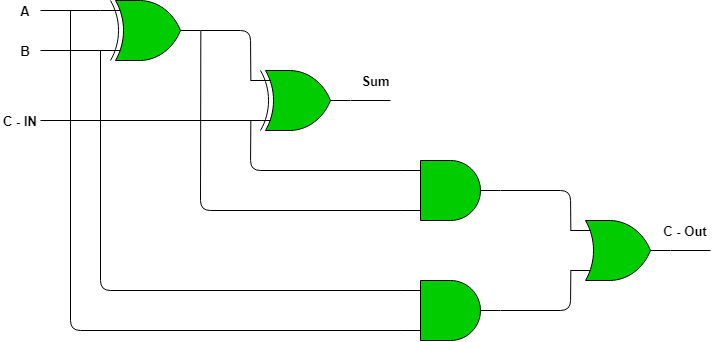

In [56]:
Image('seds-quantum-computing/Jesher/images/fulladder.png')

In [57]:
qr = QuantumRegister(8)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)
circ.x(0) 
circ.x(1)
circ.x(2)

In [58]:
circ.cx(0,3)#XOR
circ.cx(1,3)
circ.cx(3,7)
circ.cx(2,7)
circ.measure(7,0)
print(f'Sum output: {test(circ)}')

Sum output: 01


In [59]:
circ.ccx(0,1,4)
circ.ccx(2,3,5)#AND 
circ.ccx(4,5,6)#OR 
circ.cx(4,6)
circ.cx(5,6)
circ.measure(6,1)
circ.draw('mpl')
print(f'Carry Output: {test(circ)}')

Carry Output: 11


A	B	C	S	C
0	0	0	0	0
0	0	1	1	0
0	1	0	1	0
0	1	1	0	1
1	0	0	1	0
1	0	1	0	1
1	1	0	0	1
1	1	1	1	1


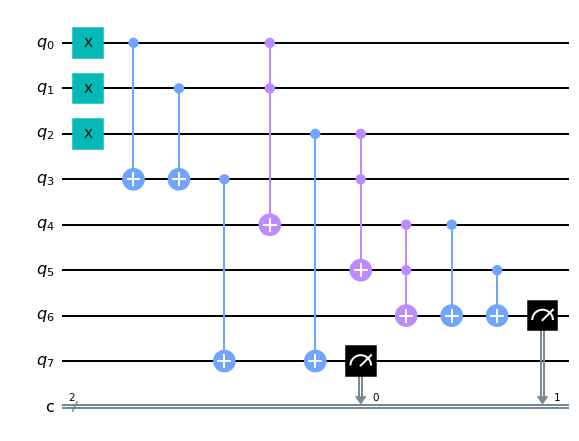

In [60]:

print("A\tB\tC\tS\tC")
l = [(0, 0,0), (0,0, 1), (0,1, 0), (0,1, 1),(1,0,0),(1,0,1),(1,1,0),(1,1,1)]
for a, b,c in l:
    circ = QuantumCircuit(8,2)
    if a != 0:
        circ.x(0)
    if b != 0:
        circ.x(1)
    if c!=0:
        circ.x(2)
    circ.cx(0,3)
    circ.cx(1,3)
    circ.cx(3,7)
    circ.cx(2,7)
    circ.ccx(0,1,4)
    circ.ccx(2,3,5)#AND 
    circ.ccx(4,5,6)
    circ.cx(4,6)
    circ.cx(5,6)
    circ.measure(7,0)
    circ.measure(6, 1)
    
    print(f"{a}\t{b}\t{c}\t{test(circ)[1]}\t{test(circ)[0]}")

circ.draw('mpl')

# 👀 Challenge - Task
## Full - Subtractor

## Logic Circuit

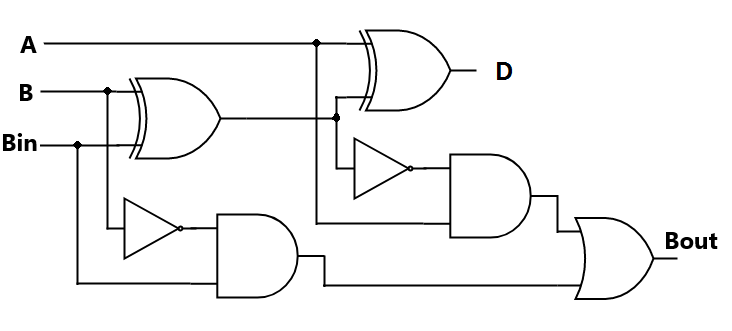

In [61]:
Image('seds-quantum-computing/Jesher/images/fullsubtractor.png')

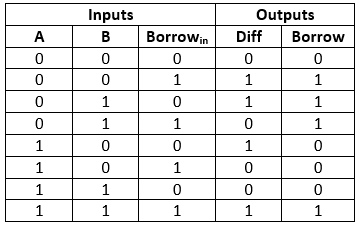

In [62]:
Image('seds-quantum-computing/Jesher/images/fullsubtractortt.png')

## Calculate the Difference

## Calculate the Borrow

## Put it all together